In [1]:
#imports
import math
import numpy as np
import xarray as xr


In [17]:
dataDIR="../../Datasets/FINAL_MODIS_PreMon.nc"
data = xr.open_dataset(dataDIR)

### Estimation of Nd <br>
<img  width=200 src="../formulas/Nd2.png">

In [18]:
alpha=1.37*math.pow(10,-5) #m−0.5
re=data.Cloud_Effective_Radius_Liquid_Mean
tau=data.Cloud_Optical_Thickness_Combined_Mean 
re=re[:,:,:].astype(np.double)
re=re*math.pow(10,-6)
tau=tau[:,:,:].astype(np.double)

Nd=alpha*np.power(tau,0.5)*np.power(re,-2.5)
Nd=Nd*math.pow(10,-6)

In [19]:
Nd.to_netcdf('Nd_PremonsoonReCheck.nc')


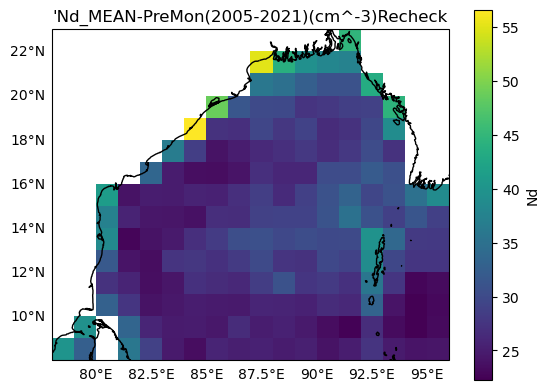

In [21]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

ax = plt.axes(projection=ccrs.PlateCarree())
dataDIR="Nd_PremonsoonReCheck.nc"
data = xr.open_dataset(dataDIR)

data['Nd'] = data['__xarray_dataarray_variable__']
data = data.drop(['__xarray_dataarray_variable__'])

Nd=data.Nd
Nd=Nd[:,:,:].astype(np.double)


Nd_mean=Nd.mean(dim='time', skipna=True)
Nd_mean.plot(ax=ax) 
lat, lon = Nd_mean.indexes.values()
# plt.contourf(lon, lat, Nd_mean, 60,
#              transform=ccrs.PlateCarree())
plt.title("'Nd_MEAN-PreMon(2005-2021)(cm^-3)Recheck")
ax.coastlines()
gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False
plt.savefig('Nd_MEAN-PreMon(2005-2021)Recheck.png',dpi=300)
# ax.legend()
plt.show()
